## About data
It is taken from Kaggle. It contains cost of advertisement on TV, Radio and Newspaper. Based on these costs, we have to predict sales.

Dataset: https://www.kaggle.com/datasets/bumba5341/advertisingcsv

## Problem statement
To predict sales (regression)

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Explore data

In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
# Check for null values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().sum()

0

## Observation
* There are 200 rows and 5 columns in the dataset.
* All the columns are numerial.
* There are niether any null values nor any duplicates in the data.

## Data preprocessing

In [7]:
# Drop unncessary columns
df.drop('Unnamed: 0', axis = 1, inplace = True)
# View changed shape
df.shape

(200, 4)

## Data visualization

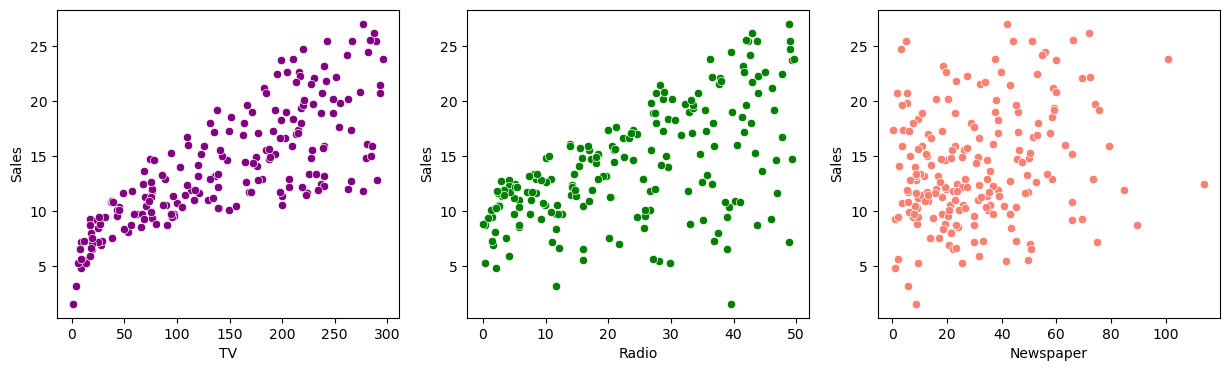

In [8]:
columns = ['TV', 'Radio', 'Newspaper']
colors = ['purple', 'green', 'salmon']

plt.figure(figsize=(15,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.scatterplot(df[columns[i]], df['Sales'], color=colors[i])
plt.show()

There seems linear relationship between 'TV' and 'Sales'. As cost on TV advertisements increase, sales also increase. For Radio advertisements as well, there is linear relation to some extent. Newspaper advertisement doesn't seem to have much effect on sales.

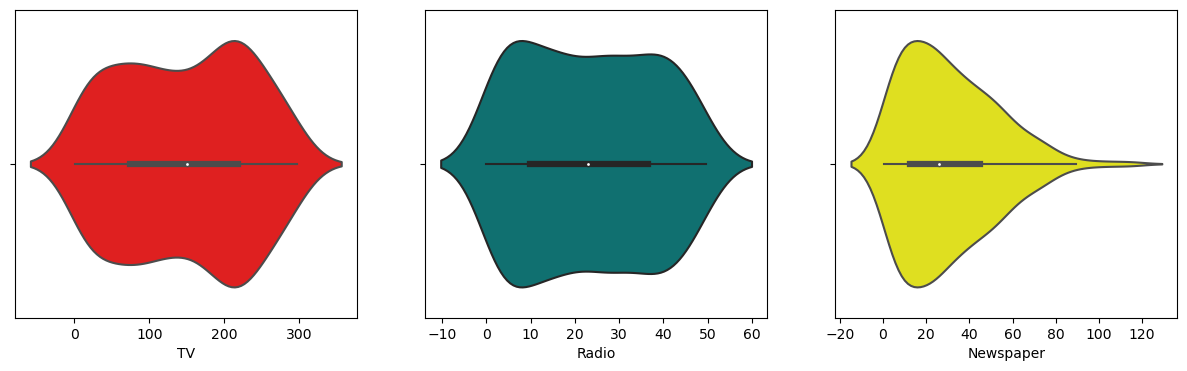

In [9]:
columns = ['TV', 'Radio', 'Newspaper']
color = ['red', 'teal', 'yellow']

plt.figure(figsize=(15,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.violinplot(df[columns[i]], color=color[i])
plt.show()

Advertisements cost is concentrated in between 150 to 250 for TV, 10 to 40 for Radio and 10 to 30 for Newspaper.

<AxesSubplot:>

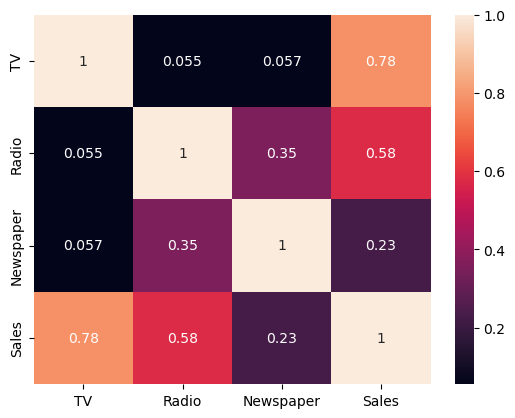

In [10]:
sns.heatmap(df.corr(), annot=True)

Target variable 'Sales' is strongly related to 'TV'.

## Model Building: Decision Tree Regressor

In [11]:
# Define x & y
x = df.iloc[:,:-1]
y = df['Sales']

In [12]:
# Splitting data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 33)

In [13]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [14]:
# Hyperparameter Optimization using GridSearchCV

from sklearn.tree import DecisionTreeRegressor
DTC = DecisionTreeRegressor() 

#hyperparameters
parameters = {'criterion': ['squared_error', 'absolute_error'], 
              'splitter':['best','random'], 
              'max_depth' : [1,2,3,4,5,6],
              'min_samples_split':[1,2,3,4,5]} 

#initializing model
from sklearn.model_selection import GridSearchCV
gd = GridSearchCV(DTC, parameters, cv = 5, n_jobs = -1, verbose = 1)

#fitting training data
gd.fit(xtrain,ytrain)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

In [15]:
# Finding best parameters
print('Score of the model: ', gd.best_score_)
print('------------------------------------')
print('Best parameters: \n', gd.best_params_)

Score of the model:  0.9349628460561223
------------------------------------
Best parameters: 
 {'criterion': 'absolute_error', 'max_depth': 6, 'min_samples_split': 4, 'splitter': 'best'}


In [16]:
# Fitting best parameters into decision tree model
DTC = DecisionTreeRegressor(criterion='absolute_error', max_depth=6, min_samples_split= 4, splitter = 'best')
DTC.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='absolute_error', max_depth=6,
                      min_samples_split=4)

In [17]:
# Prediction
ypred = DTC.predict(xtest)

In [18]:
# Evaluation of the model using sklearn metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('MSE: ', mean_squared_error(ytest, ypred))
print('MAE: ', mean_absolute_error(ytest, ypred))
print('R2 score: ', r2_score(ytest, ypred))

MSE:  1.3043333333333336
MAE:  0.9016666666666668
R2 score:  0.9568067537326338


### As r2 score value is close to 1, this is an efficient model.